In [2]:
# Import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import numpy as np
from IPython.display import display
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
news_orgs = ("BBC", "CBS", "CNN","FoxNews","nytimes")
# Create arrays to hold sentiments for all news organizations
all_sentiments=[]
sentiment_means=[]

In [6]:
for org in news_orgs:
    
    # Reset counter for each news_org loop
    counter=1
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Run search for each tweet
    public_tweets = api.search(org, count=100, result_type="recent",lang='en')       
    print(json.dumps(public_tweets["statuses"], indent=4, sort_keys=True, separators=(',',': ')))   
     # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        # Add each value to the appropriate arrays above
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)  
        #print(org)
        #print (compound_list, tweets_ago)
        #print(" ")
        
        # Append all sentiments to an array
        all_sentiments.append({" Media" : org,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets_Ago": counter
                            })  
        # Add 1 to counter    
        counter+=1
        
    # Store the Average Sentiments into the array created above
    sentiment_means.append({" Media": org,
                    "Compound_Mean": np.mean(compound_list),
                    "Positive": np.mean(positive_list),
                    "Neutral": np.mean(negative_list),
                    "Negative": np.mean(neutral_list),
                    "Count": len(compound_list)
                    })

[
    {
        "contributors": null,
        "coordinates": null,
        "created_at": "Thu Aug 02 19:11:21 +0000 2018",
        "entities": {
            "hashtags": [],
            "symbols": [],
            "urls": [
                {
                    "display_url": "bbc.co.uk/music/artists/\u2026",
                    "expanded_url": "http://www.bbc.co.uk/music/artists/75cd2e76-42a1-4ac9-9f36-1973e3071fcb",
                    "indices": [
                        47,
                        70
                    ],
                    "url": "https://t.co/bxMjzkLw0X"
                }
            ],
            "user_mentions": [
                {
                    "id": 189584119,
                    "id_str": "189584119",
                    "indices": [
                        36,
                        46
                    ],
                    "name": "#NOBEHAVIOUR",
                    "screen_name": "BigTobzsf"
                }
            ]
        },
        "

[
    {
        "contributors": null,
        "coordinates": null,
        "created_at": "Thu Aug 02 19:11:13 +0000 2018",
        "entities": {
            "hashtags": [],
            "symbols": [],
            "urls": [],
            "user_mentions": [
                {
                    "id": 914351328968798209,
                    "id_str": "914351328968798209",
                    "indices": [
                        3,
                        16
                    ],
                    "name": "Raziel",
                    "screen_name": "JanosAuddron"
                },
                {
                    "id": 759251,
                    "id_str": "759251",
                    "indices": [
                        104,
                        108
                    ],
                    "name": "CNN",
                    "screen_name": "CNN"
                },
                {
                    "id": 97739866,
                    "id_str": "97739866",
                

[
    {
        "contributors": null,
        "coordinates": null,
        "created_at": "Thu Aug 02 19:11:23 +0000 2018",
        "entities": {
            "hashtags": [],
            "symbols": [],
            "urls": [],
            "user_mentions": [
                {
                    "id": 1834897848,
                    "id_str": "1834897848",
                    "indices": [
                        0,
                        15
                    ],
                    "name": "Anthony",
                    "screen_name": "StratPlayinLib"
                },
                {
                    "id": 891104978374361088,
                    "id_str": "891104978374361088",
                    "indices": [
                        16,
                        28
                    ],
                    "name": "\ud83c\udd81\ud83c\udd84\ud83c\udd82\ud83c\udd82\ud83c\udd78\ud83c\udd70 \ud83c\udd83\ud83c\udd81\ud83c\udd7e\ud83c\udd7b\ud83c\udd7b\u2122\u00ae\u2139",
               

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
# Convert all_sentiments to DataFrame
all_sentiments_pd = pd.DataFrame.from_dict(all_sentiments)
all_sentiments_pd.to_csv("sentiments_array_pd.csv")
display(all_sentiments_pd)
#print(all_sentiments_pd.dtypes)

# Convert sentiment_means to DataFrame 
sentiment_means_pd = pd.DataFrame.from_dict(sentiment_means) 
display(sentiment_means_pd)

,Media,Compound,Date,Negative,Neutral,Positive,Tweets_Ago
0,BBC,-0.1027,Thu Aug 02 19:11:21 +0000 2018,0.220,0.600,0.180,1
1,BBC,-0.6249,Thu Aug 02 19:11:21 +0000 2018,0.223,0.689,0.089,2
2,BBC,-0.6249,Thu Aug 02 19:11:21 +0000 2018,0.188,0.812,0.000,3
3,BBC,-0.3412,Thu Aug 02 19:11:21 +0000 2018,0.099,0.901,0.000,4
4,BBC,0.0000,Thu Aug 02 19:11:20 +0000 2018,0.000,1.000,0.000,5
5,BBC,0.0000,Thu Aug 02 19:11:20 +0000 2018,0.000,1.000,0.000,6
6,BBC,0.6239,Thu Aug 02 19:11:20 +0000 2018,0.000,0.837,0.163,7
7,BBC,-0.7096,Thu Aug 02 19:11:19 +0000 2018,0.243,0.706,0.051,8
8,BBC,0.0000,Thu Aug 02 19:11:19 +0000 2018,0.000,1.000,0.000,9
9,BBC,0.0000,Thu Aug 02 19:11:19 +0000 2018,0.000,1.000,0.000,10


,Media,Compound_Mean,Count,Negative,Neutral,Positive
0,BBC,-0.072094,100,0.86027,0.08306,0.05667
1,CBS,0.049562,100,0.85102,0.06154,0.08744
2,CNN,-0.153510,100,0.82655,0.10930,0.06414
3,FoxNews,0.025233,100,0.81934,0.08603,0.09459
4,nytimes,-0.089674,100,0.79422,0.12827,0.07749


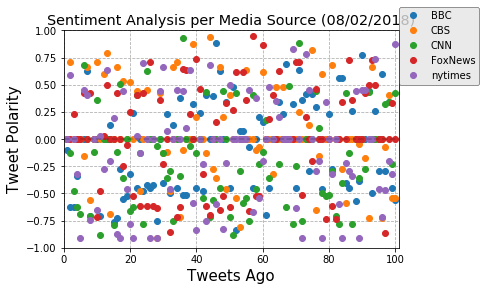

In [8]:
# Create a scatterplot
all_sentiments_pd.set_index('Tweets_Ago', inplace=True)
all_sentiments_pd.groupby(' Media')['Compound'].plot(legend=True, marker = 'o', linewidth=0)

# Customize scatterplot features
plt.style.use('ggplot')
plt.axhline(c='k', alpha=0.2, linestyle= 'dashed')
plt.axis([0,6,-1.1,1.1])
plt.xlim(0,101)
plt.ylim(-1,1)
plt.xlabel("Tweets Ago", fontsize=15)
plt.ylabel("Tweet Polarity", fontsize=15)
plt.legend(loc=(1.0, 0.75),edgecolor='black')
plt.grid(True, ls='dashed')
plt.title("Sentiment Analysis per Media Source" + " "+ "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.savefig("Sentiment Analysis of Media Tweets.png",bbox_inches='tight')
plt.show()

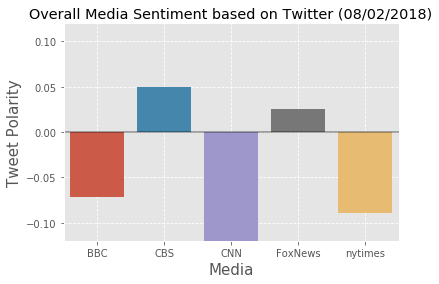

In [9]:
# Create a barplot
ax=sns.barplot(x=' Media', y='Compound_Mean', data=sentiment_means_pd)

# Customize barplot features
ax.set_xlabel('Media', fontsize=15)
ax.set_ylabel('Tweet Polarity', fontsize=15)
ax.set_title("Overall Media Sentiment based on Twitter"+ " "+ "(" + datetime.now().strftime('%m/%d/%Y') + ")")
ax.set_ylim(-0.12, 0.12)
ax.grid(True, ls='dashed')
ax.hlines(0, -1, 10, colors='k', alpha=0.4)
plt.savefig("Overall Sentiment based on Twitter.png")
plt.show()